In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division
from __future__ import print_function

import sys, os, gc, math
import tensorflow as tf
import numpy as np
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc
from scipy.fftpack import dct,idct


sys.path.append('../')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from models.neural_network import NeuralNetwork
from models.cnn import CNN
from models.util import *
from models.one_pixel_attack import *


#Seed used for choosing classes, training points, and test points.
#SEED = 14
SEED=11

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Define params of model
input_shape = (32,32,3)
num_classes = 10

In [6]:
#%%capture one
#Load model from disk
model_name = 'cifar10-resnet'
model_save_path = '../trained_models/' + model_name + '-model.json'
weights_save_path = '../trained_models/' + model_name + 'weights'
model = CNN(model_name=model_name, dataset='cifar10', transform='dct-3d',seed=SEED)
print ('Total Model Params: %d' % model.num_params)
model.load_model(model_save_path, weights_save_path) 
#epochs = 1
#model.train(epochs=epochs)
#model.save_model(model_save_path, weights_save_path)    

../models/neural_network.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  x_rec[i,:,:,0]= f_recon_r
../models/neural_network.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
  x_rec[i,:,:,1]= f_recon_g
../models/neural_network.py:174: ComplexWarning: Casting complex values to real discards the imaginary part
  x_rec[i,:,:,2]= f_recon_b


Learning rate:  0.001
Total Model Params: 273066
Loaded model from disk


In [21]:
#Model Accuracy
print ('Model Accuracy: %.5f' % (model.model.evaluate(model.test_data, model.test_labels)[1]))

6073/6073 [==============================] - 1s 200us/step
Model Accuracy: 0.90071


In [8]:
%%capture two
#Get training samples
num_train_samples = 1000
data_indices = model.gen_rand_indices(low=int(model.train_data.shape[0]/2), high=model.train_data.shape[0], seed=SEED, num_samples=num_train_samples)
train_data = model.train_data[data_indices]
train_data_labels = model.train_labels[data_indices]
train_data_labels_int = np.argmax(train_data_labels, axis=1)

**GREYBOX ATTACKS**

In [22]:
#%%capture three
num_test_samples_per_class = 10
num_test_samples = num_classes*num_test_samples_per_class

#Generate test points
test_indices = model.gen_rand_indices_all_classes(y=model.test_labels, seed=SEED, num_samples=num_test_samples_per_class)

In [23]:
#%%capture four
import time
reg_data = model.test_data[test_indices]
start_time = time.time()
Op = OnePixelAttack(input_shape)
op_data,_ = Op.attack_all(model.model, model.test_data[test_indices], model.test_labels[test_indices])
print("--- OP Time: %s seconds ---" % (time.time() - start_time))

(400, 5)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5

../models/differential_evolution.py:582: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence) is True):


(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(

(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(

(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(

(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 

(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(

(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 

(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(

(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
(400, 5)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 

(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(400, 5)
(5,)
(5,)
--- OP Time: 407.72579813 seconds ---


In [7]:
op_predss

NameError: name 'op_predss' is not defined

In [51]:
#%%capture five
reg_data = np.load('data/reg_data_mnist_op.npy')
op_data = np.load('data/op_data_mnist_op.npy')

IOError: [Errno 2] No such file or directory: 'data/reg_data_mnist_op.npy'

In [8]:
%%capture five
np.save('data/reg_data_mnist_op.npy', reg_data)
np.save('data/op_data_mnist_op.npy', op_data)

In [10]:
%%capture six
#Reset tf.graph() as Cleverhans modifies the graph
tf.reset_default_graph()

#Reload the model and weights
model = CNN(model_name=model_name, dataset='mnist-big',transform='dct', seed=SEED)
model.load_model(model_save_path, weights_save_path)    

TypeError: super(type, obj): obj must be an instance or subtype of type

In [24]:
print ('Model Accuracy REG: %.5f' % (model.model.evaluate(reg_data,model.test_labels[test_indices])[1]))
print ('Model Accuracy OP: %.5f' % (model.model.evaluate(op_data,model.test_labels[test_indices])[1]))

100/100 [==============================] - 0s 440us/step
Model Accuracy REG: 0.88000
100/100 [==============================] - 0s 280us/step
Model Accuracy OP: 0.63000


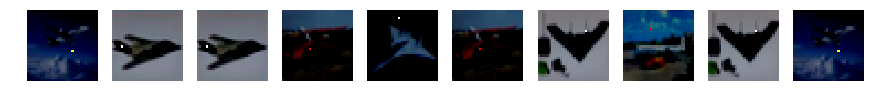

In [26]:
visualize(op_data[x_vis].reshape(-1,*input_shape), 10, '../figures/test_op')

Regular: 


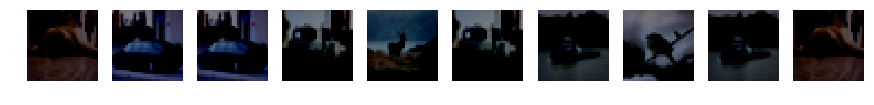

CW-l0: 


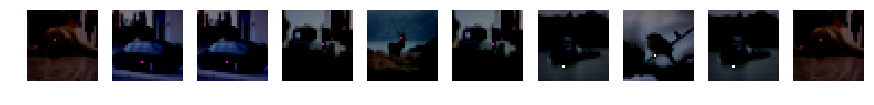

In [18]:
#Lets visualize samples from each attack
x_vis = np.random.choice(range(0,num_test_samples), 10)
print ('Regular: ')
visualize(reg_data[x_vis].reshape(-1,*input_shape), 10, '../figures/reg-mnist_op')
print ('CW-l0: ')
visualize(op_data[x_vis].reshape(-1,*input_shape), 10, '../figures/op-mnist_op')

In [19]:
%%capture seven
#Get predictions
reg_preds = model.model.predict(reg_data.reshape(-1,*input_shape))
op_preds = model.model.predict(op_data.reshape(-1,*input_shape))

#Convert preds to labels
reg_labels = preds_to_labels(reg_preds)
op_labels = preds_to_labels(op_preds)

#Select Adversarial Points (i.e. points that lead to misclassification)
true_preds = np.argmax(model.test_labels[test_indices], axis=1)

#Check which points are actually adversarial and select those
op_idx = np.where(np.argmax(op_preds, axis=1) != true_preds)[0]


#Filter data points to be used for similarity
op_data_fil = op_data[op_idx]


#Filter labels to be used
op_labels_fil = op_labels[op_idx]

In [20]:
#Get l-0 distortion 
print ('CW-l0: %.5f' % (avg_l0_dist(reg_data[op_idx], op_data_fil)))

CW-l0: 3.00000


In [16]:
clean_reg = np.zeros(op_data.shape)
for i in range(num_test_samples):
    x_adv = reg_data[i,:,:,0]
    x_hat = dct(x_adv.flatten(),norm='ortho')
    x_hat = get_topk_vec(x_hat,k=40)
    clean_reg[i,:,:,0] = idct(x_hat.flatten(),norm='ortho').reshape(28,28)

In [19]:
%%capture eleven
#Reconstruct CW-l0
t=20
clean_op_iht = np.zeros(op_data.shape)
for i in range(num_test_samples):
    x_adv = op_data[i,:,:,0].flatten()
    x_hat,_ = iht(x_adv,t, T=100,k=40)
    clean_op_iht[i,:,:,0]= idct(x_hat.flatten(),norm='ortho').reshape(28,28)

In [21]:
%%capture thirteen
np.save('data/clean_mnist_op-iht', clean_op_iht)

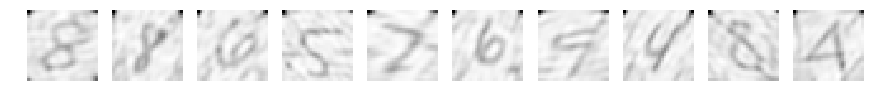

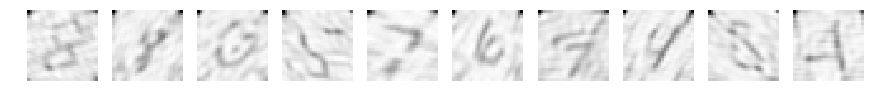

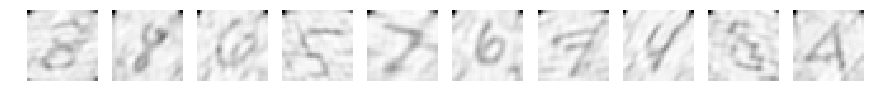

In [22]:
visualize(clean_reg[x_vis].reshape(-1,*input_shape), 10, '../figures/reg-test-mnist_op')
visualize(clean_jsma_iht[x_vis].reshape(-1,*input_shape), 10, '../figures/op-clean-mnist_op-iht')

In [23]:
print ('Model Accuracy Reconstructed CW-l0: %.5f' % (model.model.evaluate(clean_op_iht,model.test_labels[test_indices])[1]))

1000/1000 [==============================] - 0s 78us/step
Model Accuracy Reconstructed CW-l0: 0.78000
1000/1000 [==============================] - 0s 66us/step
Model Accuracy Reconstructed JSMA: 0.93600
